In [53]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import matplotlib.dates as matDates

In [54]:
confirm_cases = pd.read_csv ('time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('time_series_covid19_deaths_global.csv')

In [55]:
confirm_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205324,205391,205506,205541,205612,205612,205802,205830,205907,206073
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333282,333293,333305,333316,333322,333330,333330,333338,333343,333360
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271035,271041,271050,271057,271061,271061,271079,271082,271090,271096
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,46824,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,104491,104491,104491,104491,104491,104491,104491,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333721,333721,333721,333746,333746,333746


In [56]:
death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7833,7834
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,156,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1923,1923,1923,1923,1923,1923,1923,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


In [57]:
confirm_cases['Total_Confirmed_Cases'] = confirm_cases.iloc[:,4:].sum(axis=1)
confirm_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,Total_Confirmed_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205391,205506,205541,205612,205612,205802,205830,205907,206073,109596433
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333293,333305,333316,333322,333330,333330,333338,333343,333360,152829928
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271041,271050,271057,271061,271061,271079,271082,271090,271096,156153493
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,47219,47219,19868545
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104491,104676,104676,49726513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,343629272
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,162032
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,6708825
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333721,333721,333746,333746,333746,162802502


In [58]:
death_cases['Total_Death_Cases'] = death_cases.iloc[:,4:].sum(axis=1)
death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,Total_Death_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7834,4650362
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,2132993
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,4226937
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,157,157,111151
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1923,1924,1924,1042716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,3195325
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,1303864
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,2236085


In [59]:
new_confirm = confirm_cases[['Province/State','Country/Region','Total_Confirmed_Cases']]
new_death = death_cases[['Province/State','Country/Region','Total_Death_Cases']]

In [60]:
global_data = pd.merge(new_confirm, new_death, on=['Province/State','Country/Region'])
global_data

,Province/State,Country/Region,Total_Confirmed_Cases,Total_Death_Cases
0,NaN,Afghanistan,109596433,4650362
1,NaN,Albania,152829928,2132993
2,NaN,Algeria,156153493,4226937
3,NaN,Andorra,19868545,111151
4,NaN,Angola,49726513,1042716
...,...,...,...,...
284,NaN,West Bank and Gaza,343629272,3195325
285,NaN,Winter Olympics 2022,162032,0
286,NaN,Yemen,6708825,1303864
287,NaN,Zambia,162802502,2236085


In [62]:
API = 'WOJT60ZJPJ5HUWA4'
ts = TimeSeries(key=API, output_format='pandas')
american = ts.get_daily_adjusted('NASDX')
canadian = ts.get_daily_adjusted('POW')
travel = ts.get_daily_adjusted('AC') 
real_estate = ts.get_daily_adjusted('PLD')
precious_metals = ts.get_daily_adjusted('CIGI')

In [63]:
df_american = pd.DataFrame(american[0]).reset_index(level=0)
df_canadian = pd.DataFrame(canadian[0]).reset_index(level=0)
df_travel = pd.DataFrame(travel[0]).reset_index(level=0)
df_real_estate = pd.DataFrame(real_estate[0]).reset_index(level=0)
df_precious_metals = pd.DataFrame(precious_metals[0]).reset_index(level=0)

In [64]:
df_american

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-02,25.90,25.90,25.90,25.90,25.900000,0.0,0.0000,1.0
1,2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
2,2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
3,2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
4,2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-20,27.63,27.63,27.63,27.63,26.806024,0.0,0.0000,1.0
96,2022-07-19,27.20,27.20,27.20,27.20,26.388848,0.0,0.0000,1.0
97,2022-07-18,26.38,26.38,26.38,26.38,25.593301,0.0,0.0000,1.0
98,2022-07-15,26.62,26.62,26.62,26.62,25.826144,0.0,0.0000,1.0


In [65]:
df_canadian

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,10.060,10.0600,10.0600,10.0600,10.0600,26.0,0.0,1.0
1,2022-12-02,10.065,10.0650,10.0600,10.0600,10.0600,300.0,0.0,1.0
2,2022-12-01,10.060,10.0700,10.0600,10.0650,10.0650,5317.0,0.0,1.0
3,2022-11-30,10.060,10.0700,10.0400,10.0400,10.0400,117347.0,0.0,1.0
4,2022-11-29,10.050,10.0599,10.0500,10.0599,10.0599,25249.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,9.870,9.8700,9.8700,9.8700,9.8700,0.0,0.0,1.0
96,2022-07-20,9.870,9.8700,9.8686,9.8700,9.8700,300.0,0.0,1.0
97,2022-07-19,9.870,9.8700,9.8700,9.8700,9.8700,67.0,0.0,1.0
98,2022-07-18,9.870,9.8700,9.8700,9.8700,9.8700,0.0,0.0,1.0


In [66]:
df_travel

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,41.65,42.230,40.67,42.07,42.070000,3393.0,0.0,1.0
1,2022-12-02,40.41,41.640,40.41,41.64,41.640000,2395.0,0.0,1.0
2,2022-12-01,38.13,40.450,38.13,40.30,40.300000,3230.0,0.0,1.0
3,2022-11-30,39.45,40.450,38.00,40.45,40.450000,5414.0,0.1,1.0
4,2022-11-29,40.98,40.980,38.60,38.60,38.504809,1748.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,38.46,38.950,38.00,38.95,38.853946,4848.0,0.0,1.0
96,2022-07-20,37.15,38.900,37.15,38.90,38.804069,7346.0,0.0,1.0
97,2022-07-19,37.74,37.970,37.69,37.72,37.626979,3592.0,0.0,1.0
98,2022-07-18,37.73,37.918,37.15,37.42,37.327719,3176.0,0.0,1.0


In [67]:
df_real_estate

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,116.00,116.24,113.735,114.26,114.260000,3170028.0,0.0,1.0
1,2022-12-02,115.56,118.02,114.820,116.94,116.940000,3014114.0,0.0,1.0
2,2022-12-01,119.05,119.49,115.740,117.10,117.100000,2784289.0,0.0,1.0
3,2022-11-30,113.26,117.82,112.490,117.79,117.790000,8839715.0,0.0,1.0
4,2022-11-29,111.60,114.12,111.260,113.81,113.810000,2635129.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,124.63,125.70,123.070,125.68,124.865302,3093862.0,0.0,1.0
96,2022-07-20,125.11,127.43,124.000,124.57,123.762498,3235660.0,0.0,1.0
97,2022-07-19,120.57,125.24,119.900,125.11,124.298997,3884663.0,0.0,1.0
98,2022-07-18,123.37,124.28,119.010,119.20,118.427308,4337308.0,0.0,1.0


In [68]:
df_precious_metals

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,96.400,96.51,92.6225,93.18,93.18,189754.0,0.0,1.0
1,2022-12-02,95.250,97.83,95.0400,96.20,96.20,75777.0,0.0,1.0
2,2022-12-01,94.920,96.95,92.3700,96.53,96.53,85762.0,0.0,1.0
3,2022-11-30,91.585,94.68,91.2200,94.67,94.67,86327.0,0.0,1.0
4,2022-11-29,92.000,92.65,91.1600,91.66,91.66,43569.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,119.900,122.38,119.3300,122.08,122.08,26783.0,0.0,1.0
96,2022-07-20,119.890,121.21,119.0300,120.56,120.56,31837.0,0.0,1.0
97,2022-07-19,118.470,120.93,117.8200,119.55,119.55,64394.0,0.0,1.0
98,2022-07-18,115.000,118.70,114.8400,117.00,117.00,61075.0,0.0,1.0


In [69]:
df_american = df_american[['date','2. high','3. low']].rename(columns={"2. high":"american_high","3. low":"american_low"})
df_canadian = df_canadian[['date','2. high','3. low']].rename(columns={"2. high":"canadian_high","3. low":"canadian_low"})
df_travel = df_travel[['date','2. high','3. low']].rename(columns={"2. high":"travel_high","3. low":"travel_low"})
df_real_estate = df_real_estate[['date','2. high','3. low']].rename(columns={"2. high":"real_estate_high","3. low":"real_estate_low"})
df_precious_metals = df_precious_metals[['date','2. high','3. low']].rename(columns={"2. high":"metal_high","3. low":"metal_low"})

In [71]:
stocks_df = df_american.merge(df_canadian, on="date").merge(df_precious_metals, on="date").merge(df_real_estate,on="date").merge(df_travel,on="date")

In [73]:
deaths_canada = death_cases[death_cases['Country/Region'] == "Canada"].groupby("Country/Region").sum()
deaths_USA = death_cases[death_cases['Country/Region'] == "US"].groupby("Country/Region").sum()

confirmed_canada = confirm_cases[confirm_cases['Country/Region'] == "Canada"].groupby("Country/Region").sum()
confirmed_USA = confirm_cases[confirm_cases['Country/Region'] == "US"].groupby("Country/Region").sum()

In [84]:
canada_death_case_df = deaths_canada.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()
canada_death_case_df.columns = ["date","Canada_Death_Cases"]
canada_death_case_df = canada_death_case_df.iloc[1:-1]

In [85]:
US_death_case_df = deaths_USA.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()
US_death_case_df.columns = ["date","US_Death_Cases"]
US_death_case_df = US_death_case_df.iloc[1:-1]

In [86]:
canada_confirmed_case_df = confirmed_canada.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()
canada_confirmed_case_df.columns = ["date","Canada_Confirmed_Cases"]
canada_confirmed_case_df = canada_confirmed_case_df.iloc[1:-1]

In [87]:
US_confirmed_case_df = confirmed_USA.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()

US_confirmed_case_df.columns = ["date","US_Confirmed_Cases"]
US_confirmed_case_df = US_confirmed_case_df.iloc[1:-1]

In [89]:
df_death = canada_death_case_df.merge(US_death_case_df, on="date")
df_confirm = canada_confirmed_case_df.merge(US_confirmed_case_df, on="date")

df_final = df_death.merge(df_confirm, on = "date")

In [90]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [92]:
df_final = df_final.merge(stocks_df, on='date',how='left')

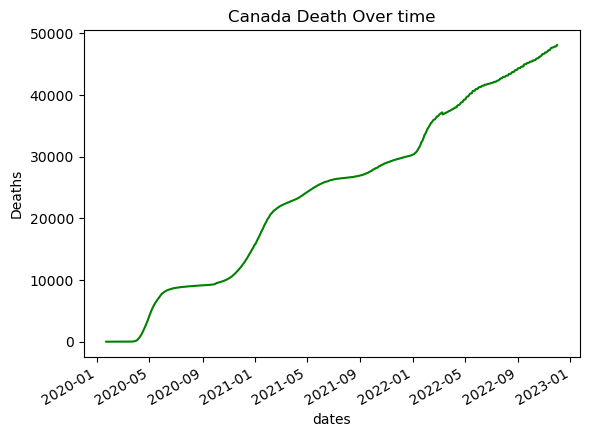

In [93]:
fig = plt.figure()

plt.plot_date(df_final['date'],df_final['Canada_Death_Cases'],'g-')

plt.title("Canada Death Over time")
plt.xlabel("dates")
plt.ylabel("Deaths")

fig.autofmt_xdate()
plt.show()

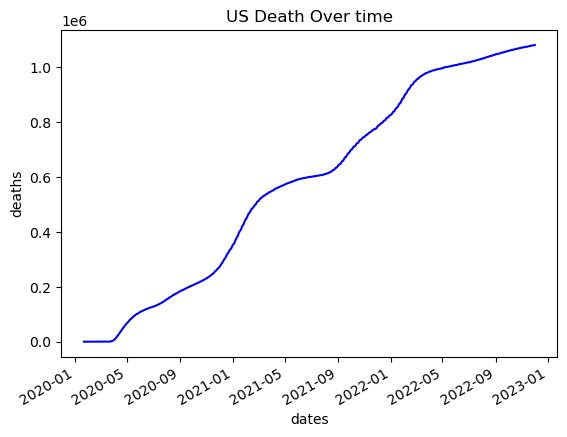

In [94]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada_Death_Cases'],'b-')
plt.plot_date(df_final['date'],df_final['US_Death_Cases'],'g-')

plt.title("Death ratio")
plt.xlabel("dates")
plt.ylabel("Death in Ratio")

fig.autofmt_xdate()
plt.show()


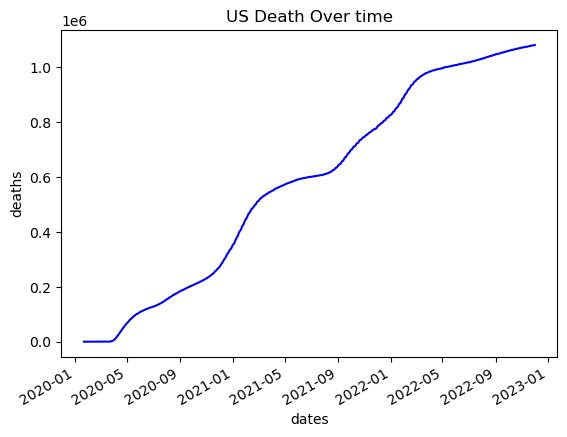

In [106]:

fig = plt.figure()
plt.plot_date(df_final['date'],df_final['US_Death_Cases'],'b-')

plt.title("US Death Over time")
plt.xlabel("dates")
plt.ylabel("deaths")

fig.autofmt_xdate()
plt.show()

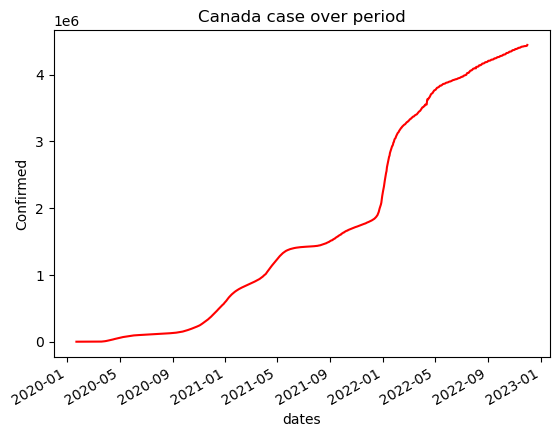

In [107]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada_Confirmed_Cases'],'r-')

plt.title("Canada case over period")
plt.xlabel("dates")
plt.ylabel("Confirmed")

fig.autofmt_xdate()
plt.show()

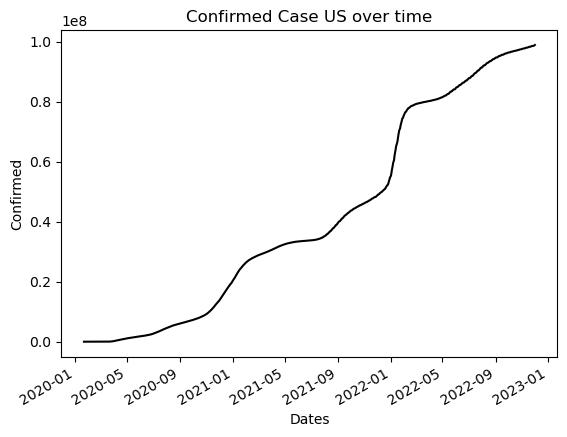

In [97]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['US_Confirmed_Cases'],'black')

plt.title("Confirmed Case US over time")
plt.xlabel("Dates")
plt.ylabel("Confirmed")

fig.autofmt_xdate()
plt.show()

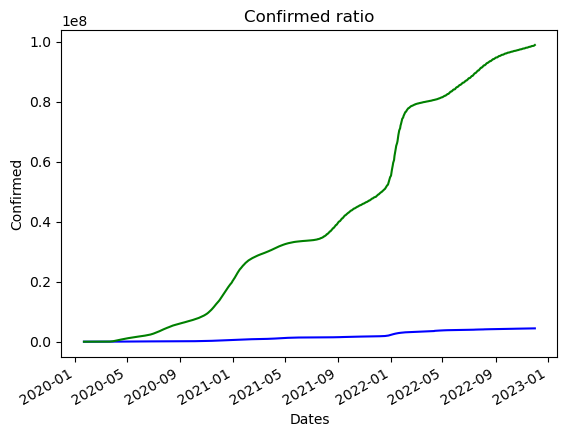

In [98]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada_Confirmed_Cases'],'b-')
plt.plot_date(df_final['date'],df_final['US_Confirmed_Cases'],'g-')

plt.title("Confirmed ratio")
plt.xlabel("Dates")
plt.ylabel("Confirmed")

fig.autofmt_xdate()
plt.show()

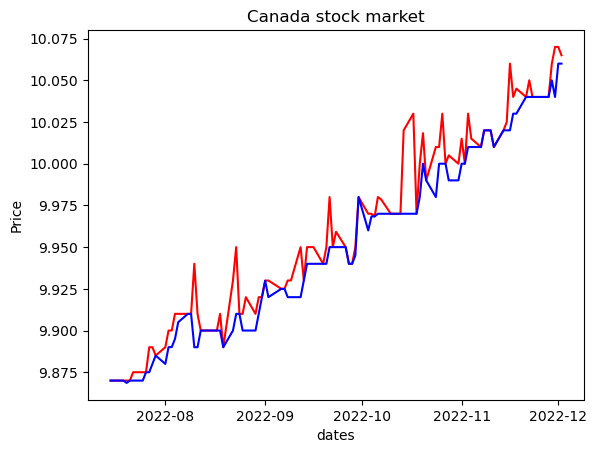

In [110]:
fig = plt.figure()
plt.plot_date(stocks_df['date'],stocks_df['canadian_high'],'r-')
plt.plot_date(stocks_df['date'],stocks_df['canadian_low'],'b-')

plt.title("Canada stock market")
plt.xlabel("dates")
plt.ylabel("Price")

plt.show()


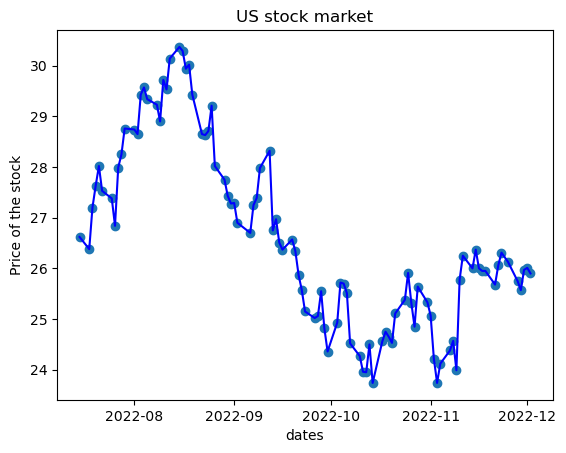

In [109]:

fig = plt.figure()
plt.plot_date(stocks_df['date'],stocks_df['american_low'])
plt.plot_date(stocks_df['date'],stocks_df['american_high'],'b-')

plt.title("US stock market")
plt.xlabel("dates")
plt.ylabel("Price of the stock")

plt.show()